In [1]:
import skimage
import skimage.io
import skimage.transform
from skimage.transform import resize
from scipy import signal
import os
import numpy as np
import utils
import matplotlib.pyplot as plt

In [2]:
def magnitude(fft_im):
    real = fft_im.real
    imag = fft_im.imag
    return np.sqrt(real**2 + imag**2)

Saving image to: image_processed\moon_filtered.png


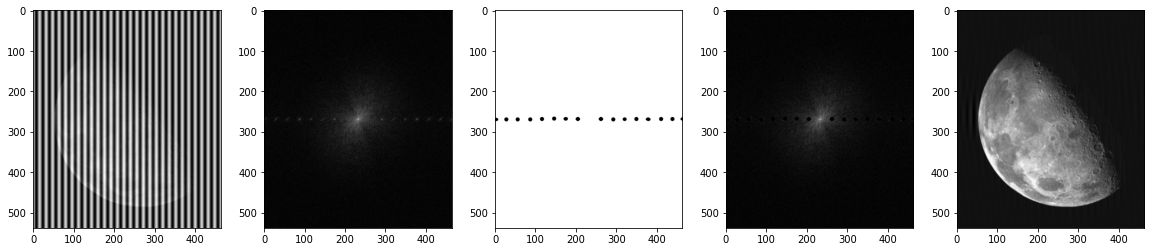

In [3]:
if __name__ == "__main__":
    # DO NOT CHANGE
    impath = os.path.join("images", "noisy_moon.png")
    im = utils.read_im(impath)

    ### START YOUR CODE HERE ### (You can change anything inside this block)
    impath = os.path.join("images", "moon_freq_mask.png")
    mask = utils.read_im(impath)
    mask =  np.dot(mask[...,:3], [0.212, 0.7152, 0.0722])
    
    fft = np.fft.fft2(im)
    fft_im = np.fft.fftshift(fft)
    fft_im = np.log(magnitude(fft_im)+1)
    
    filtered_fft = fft_im * mask 
    im_filtered = np.fft.ifft2(fft *  np.fft.ifftshift(mask)).real
    
    # Use plt.subplot to place two or more images beside eachother
    plt.figure(figsize=(20, 4))
    # plt.subplot(num_rows, num_cols, position (1-indexed))
    plt.subplot(1, 5, 1)
    plt.imshow(im, cmap="gray")
    plt.subplot(1, 5, 2) 
    # Visualize FFT
    plt.imshow(fft_im, cmap="gray")
    plt.subplot(1, 5, 3) 
    plt.imshow(mask, cmap="gray")
    plt.subplot(1, 5, 4)
    # Visualize FFT kernel
    plt.imshow(filtered_fft, cmap="gray")
    plt.subplot(1, 5, 5) 
    # Visualize filtered spatial image
    plt.imshow(im_filtered, cmap="gray")
    ### END YOUR CODE HERE ###
    utils.save_im("moon_filtered.png", utils.normalize(im_filtered))